In [1]:
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.irf import IRAnalysis
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import scipy.stats as stats
import statsmodels
from statsmodels.tsa.api import AutoReg

In [2]:
# Read data from a CSV file with labels
salesdata = "https://raw.githubusercontent.com/quruis/ECO1960/main/1960%20data.csv" 
df = pd.read_csv(salesdata)

# Convert 'Date' column to datetime format if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Convert 'Date' column to datetime format if it's not already
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Pump_price,Fed_car_tax,GST_HST,Ret_sales,GDP,LFP,Car_Sales,Wages
0,2017-01-01,111.5,0.0,12.8,8071889,1964009,2470188,46261,6256584
1,2017-02-01,107.6,0.0,12.4,8151735,1970851,2474779,52347,6284840
2,2017-03-01,106.9,0.0,12.3,8251571,1979281,2479370,77551,6295532
3,2017-04-01,115.3,0.0,13.3,8430747,1988478,2483961,82527,6297280
4,2017-05-01,112.4,0.0,12.9,8374712,1992334,2488553,93022,6308896


In [3]:
df1 = {}
df1 = df

# Assuming the data is stored in a DataFrame named df
# Calculating percentage changes in ret_sales and pump_price
df1['ret_sales_change'] = df1['Ret_sales'].pct_change() * 100
df1['pump_price_change'] = df1['Pump_price'].pct_change() * 100

# Dropping the first row since percentage change is undefined for it
df1 = df1.dropna()

# Calculating price elasticity using the formula
df1['price_elasticity'] = df1['ret_sales_change'] / df1['pump_price_change']

# Displaying the results
print(df1[['Date', 'price_elasticity']])

         Date  price_elasticity
1  2017-02-01         -0.282806
2  2017-03-01         -1.882571
3  2017-04-01          0.276339
4  2017-05-01          0.264256
5  2017-06-01          0.404579
..        ...               ...
79 2023-08-01         -0.083220
80 2023-09-01          0.259009
81 2023-10-01          0.002452
82 2023-11-01         -0.644583
83 2023-12-01         -0.213398

[83 rows x 2 columns]


C:\Users\Sheva\AppData\Local\Temp/ipykernel_12368/3893824158.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price_elasticity'] = df1['ret_sales_change'] / df1['pump_price_change']


In [4]:
average_price_elasticity = df1['price_elasticity'].mean()
print("Average Price Elasticity:", average_price_elasticity)

Average Price Elasticity: 0.10128354378664421


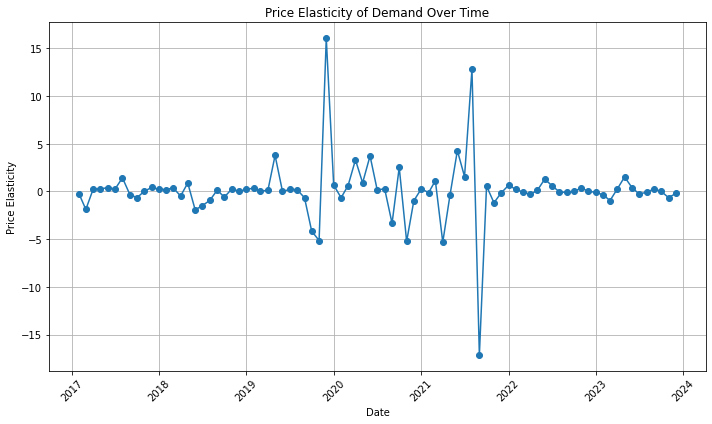

In [5]:
# Plotting price elasticity over time
plt.figure(figsize=(10, 6))
plt.plot(df1['Date'], df1['price_elasticity'], marker='o', linestyle='-')
plt.title('Price Elasticity of Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Price Elasticity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Save the plot to a location
save_path = "C:/Users/Sheva/Desktop/Images/"
plt.savefig(save_path + "price_elasticity_plot.png")

# Display the plot
plt.show()


In [13]:
# Calculate the first and third quartiles
Q1 = df1['price_elasticity'].quantile(0.25)
Q3 = df1['price_elasticity'].quantile(0.75)

# Calculate the interquartile range
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_data = df1[(df1['price_elasticity'] >= lower_bound) & (df1['price_elasticity'] <= upper_bound)]

# Calculate the average price elasticity without outliers
average_price_elasticity = filtered_data['price_elasticity'].mean()

print("Average Price Elasticity (without outliers):", average_price_elasticity)


Average Price Elasticity (without outliers): 0.09100178026726558


In [6]:
from scipy.stats import ttest_1samp

# Perform one-sample t-test
t_statistic, p_value = ttest_1samp(df1['price_elasticity'], 0)

# Define significance level
alpha = 0.05

# Check for significance
if p_value < alpha:
    print("Average price elasticity is statistically significant (p < {:.2f})".format(alpha))
else:
    print("Average price elasticity is not statistically significant (p >= {:.2f})".format(alpha))

Average price elasticity is not statistically significant (p >= 0.05)


In [7]:
# Filter data up to April 1, 2020
df2 = {}
df2 = df[df['Date'] <= '2020-02-01']


# Display the filtered DataFrame
print(df2)

         Date  Pump_price  Fed_car_tax  GST_HST  Ret_sales      GDP      LFP  \
0  2017-01-01       111.5          0.0     12.8    8071889  1964009  2470188   
1  2017-02-01       107.6          0.0     12.4    8151735  1970851  2474779   
2  2017-03-01       106.9          0.0     12.3    8251571  1979281  2479370   
3  2017-04-01       115.3          0.0     13.3    8430747  1988478  2483961   
4  2017-05-01       112.4          0.0     12.9    8374712  1992334  2488553   
5  2017-06-01       107.4          0.0     12.4    8223990  1996718  2493144   
6  2017-07-01       109.9          0.0     12.6    8272201  1995462  2497735   
7  2017-08-01       112.3          0.0     12.9    8529984  1993294  2503335   
8  2017-09-01       118.8          0.0     13.7    8367993  1998202  2508935   
9  2017-10-01       115.1          0.0     13.2    8536718  1998437  2514535   
10 2017-11-01       122.3          0.0     14.1    8554292  2007905  2520134   
11 2017-12-01       120.9          0.0  

In [8]:
# Create a new DataFrame for the log-transformed values
log_df = pd.DataFrame()

# Copy 'Date' column to new DataFrame
log_df['Date'] = df2['Date']

# Log-transform numerical columns (excluding 'Date')
for column in df.columns[1:]:
    # Calculate logarithm, replace -inf with 0
    log_values = np.log(df2[column])
    log_values[log_values == -np.inf] = 0
    log_df['log_' + column] = log_values

# Display the new DataFrame
print(log_df)

         Date  log_Pump_price  log_Fed_car_tax  log_GST_HST  log_Ret_sales  \
0  2017-01-01        4.714025         0.000000     2.549445      15.903898   
1  2017-02-01        4.678421         0.000000     2.517696      15.913741   
2  2017-03-01        4.671894         0.000000     2.509599      15.925914   
3  2017-04-01        4.747537         0.000000     2.587764      15.947396   
4  2017-05-01        4.722064         0.000000     2.557227      15.940727   
5  2017-06-01        4.676560         0.000000     2.517696      15.922566   
6  2017-07-01        4.699571         0.000000     2.533697      15.928411   
7  2017-08-01        4.721174         0.000000     2.557227      15.959098   
8  2017-09-01        4.777441         0.000000     2.617396      15.939925   
9  2017-10-01        4.745801         0.000000     2.580217      15.959887   
10 2017-11-01        4.806477         0.000000     2.646175      15.961944   
11 2017-12-01        4.794964         0.000000     2.631889     

C:\Users\Sheva\anaconda3.1\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Sheva\anaconda3.1\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
# Assuming the data is stored in a DataFrame named log_df
# Calculating percentage changes in ret_sales and pump_price
df2['ret_sales_change'] = df2['Ret_sales'].pct_change() * 100
df2['pump_price_change'] = df2['Pump_price'].pct_change() * 100

# Dropping the first row since percentage change is undefined for it
df2 = df2.dropna()

# Calculating price elasticity using the formula
df2['price_elasticity'] = df2['ret_sales_change'] / df2['pump_price_change']

# Displaying the results
print(df2[['Date', 'price_elasticity']])

         Date  price_elasticity
1  2017-02-01         -0.282806
2  2017-03-01         -1.882571
3  2017-04-01          0.276339
4  2017-05-01          0.264256
5  2017-06-01          0.404579
6  2017-07-01          0.251842
7  2017-08-01          1.426986
8  2017-09-01         -0.328102
9  2017-10-01         -0.647400
10 2017-11-01          0.032910
11 2017-12-01          0.417021
12 2018-01-01          0.215421
13 2018-02-01          0.204072
14 2018-03-01          0.379826
15 2018-04-01         -0.474888
16 2018-05-01          0.880484
17 2018-06-01         -1.926222
18 2018-07-01         -1.486261
19 2018-08-01         -0.939783
20 2018-09-01          0.136531
21 2018-10-01         -0.594473
22 2018-11-01          0.258083
23 2018-12-01          0.026548
24 2019-01-01          0.211796
25 2019-02-01          0.348658
26 2019-03-01          0.024840
27 2019-04-01          0.125373
28 2019-05-01          3.773093
29 2019-06-01          0.008187
30 2019-07-01          0.206931
31 2019-

C:\Users\Sheva\AppData\Local\Temp/ipykernel_12368/1807726826.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ret_sales_change'] = df2['Ret_sales'].pct_change() * 100
C:\Users\Sheva\AppData\Local\Temp/ipykernel_12368/1807726826.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['pump_price_change'] = df2['Pump_price'].pct_change() * 100


In [10]:
average_price_elasticity = df2['price_elasticity'].mean()
print("Average Price Elasticity:", average_price_elasticity)

Average Price Elasticity: 0.2055979733474438


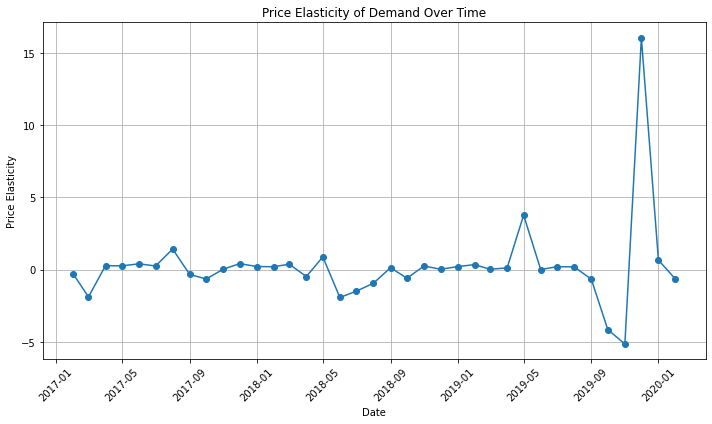

In [11]:
import matplotlib.pyplot as plt

# Plotting price elasticity over time
plt.figure(figsize=(10, 6))
plt.plot(df2['Date'], df2['price_elasticity'], marker='o', linestyle='-')
plt.title('Price Elasticity of Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Price Elasticity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Save the plot to a location
save_path = "C:/Users/Sheva/Desktop/Images/"
plt.savefig(save_path + "price_elasticity_plot2.png")

# Display the plot
plt.show()


In [14]:
# Calculate the first and third quartiles
Q1 = df2['price_elasticity'].quantile(0.25)
Q3 = df2['price_elasticity'].quantile(0.75)

# Calculate the interquartile range
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_data = df2[(df2['price_elasticity'] >= lower_bound) & (df2['price_elasticity'] <= upper_bound)]

# Calculate the average price elasticity without outliers
average_price_elasticity = filtered_data['price_elasticity'].mean()

print("Average Price Elasticity (without outliers):", average_price_elasticity)

Average Price Elasticity (without outliers): -0.031178221429939854


In [12]:
from scipy.stats import ttest_1samp

# Perform one-sample t-test
t_statistic, p_value = ttest_1samp(df1['price_elasticity'], 0)

# Define significance level
alpha = 0.05

# Check for significance
if p_value < alpha:
    print("Average price elasticity is statistically significant (p < {:.2f})".format(alpha))
else:
    print("Average price elasticity is not statistically significant (p >= {:.2f})".format(alpha))

Average price elasticity is not statistically significant (p >= 0.05)
